In [80]:
import numpy as np
import objFunctions as fct
from SimulatedAnnealing import SimulatedAnnealing
import matplotlib.pyplot as plt

In [81]:
"""
@author: ofersh@telhai.ac.il
"""
def SimulatedAnnealing(n=100, max_evals=1000, variation=lambda x: x + 2.0 * np.random.normal(size=len(x)),
                       func=lambda x: x.dot(x), seed=None):
    T_init = 6.0
    T_min = 1e-4
    alpha = 0.99
    f_lower_bound = 0
    eps_satisfactory = 1e-5
    max_internal_runs = 1000
    local_state = np.random.RandomState(seed)
    history = []
    xbest = xmin = np.random.choice([1, -1], size=n)
    fbest = fmin = func(xmin)
    eval_cntr = 1
    T = T_init
    history.append(fmin)
    while (T > T_min) and eval_cntr < max_evals:
        for _ in range(max_internal_runs):
            x = variation(xmin)
            f_x = func(x)
            eval_cntr += 1
            dE = f_x - fmin
            if dE <= 0 or local_state.uniform(size=1) < np.exp(-dE / T):
                xmin = x
                fmin = f_x
            if fmin < fbest:
                fbest = f_x
                xbest = x
                if fbest < f_lower_bound + eps_satisfactory:
                    T = T_min
                    break
            history.append(fmin)
            # if np.mod(eval_cntr, int(max_evals / 10)) == 0:
            #     print(eval_cntr, " evals: fmin=", fmin)

        T *= alpha
    return xbest, fbest, history

In [82]:
"""
@author: ofersh@telhai.ac.il
"""
def monte_carlo(n=100, evals=1000, func=fct.SwedishPump):
    X = []
    FX = []
    fmin = 0
    xmin = 0
    f_history = []
    for i in range(evals):
        x = np.random.choice([1, -1], size=n)
        f_x = func(x)
        X.append(x)
        FX.append(f_x)
        if i == 0:
            fmin = f_x
            xmin = x
        else:
            if fmin > f_x:
                fmin = f_x
                xmin = x
        f_history.append(fmin)  # Track the best f(x) at each iteration
    return fmin, xmin, f_history

In [83]:
"""
@author: chat GPT
"""
def Swap_Two_Elements(x):
    i, j = np.random.choice(len(x), size=2, replace=False)
    x[i], x[j] = x[j], x[i]
    return x


def Reverse_Subsequence(x):
    x = x.copy()
    i, j = sorted(np.random.choice(len(x), size=2, replace=False))
    x[i:j + 1] = x[i:j + 1][::-1]
    return x


def Insert_Element(x):
    i, j = sorted(np.random.choice(len(x), size=2, replace=False))
    x[i:j + 1] = x[i:j + 1][::-1]
    return x


def Bit_Flip(x):
    i = np.random.randint(len(x))
    x[i] = 1 - x[i]  # Flip the binary bit
    return x

variation_funcs = [Swap_Two_Elements, Reverse_Subsequence, Insert_Element, Bit_Flip]

In [84]:
n = 100
evals = 1000
alpha = 0.99
Nruns = 2
func_res = {}
history_dict = {}

In [85]:
for _ in range(50):
    for var_func in variation_funcs:
        fbest = []
        xbest = []
        history = []
        for i in range(Nruns):
            xmin, fmin, h = SimulatedAnnealing(n, evals, var_func, fct.SwedishPump, i + 17)
            fbest.append(fmin)
            xbest.append(xmin)
            history.append(h)  # Store the history of function values

        func_res[var_func.__name__] = min(fbest)
        history_dict[var_func.__name__] = history  # Store the history for plotting

In [89]:
for fr in func_res:
    print(f"{fr}: best f(x)={func_res[fr]}")

best_func = min(func_res, key=func_res.get)
print(f"Best variation function is: {best_func}")

Swap_Two_Elements: best f(x)=0.4654626698938745
Reverse_Subsequence: best f(x)=0.34317089910775567
Insert_Element: best f(x)=0.3952569169960474
Bit_Flip: best f(x)=0.036681901883248845
Best variation function is: Bit_Flip


In [90]:
fmin_mc, xmin_mc, f_history_mc = monte_carlo(n, evals, fct.SwedishPump)
print(f"Best f(x) found from Monte Carlo is: {fmin_mc}")

Best f(x) found from Monte Carlo is: 0.47719030349303304


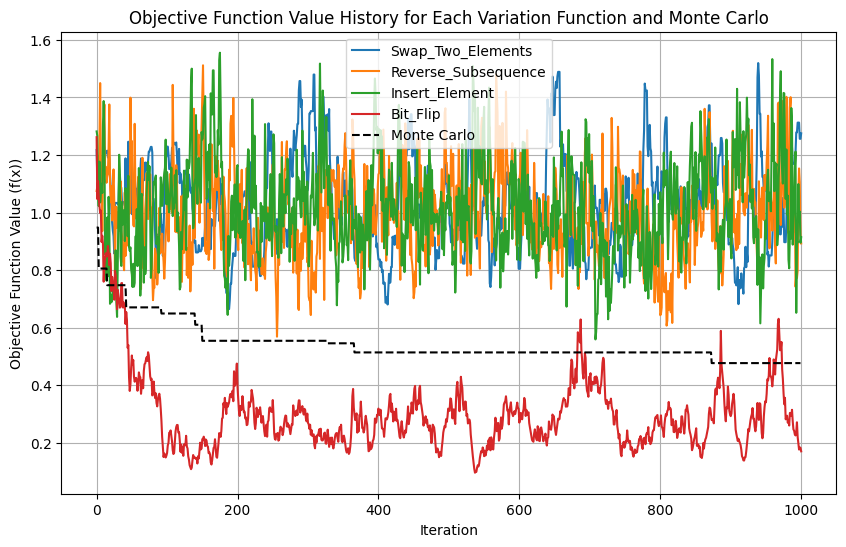

In [91]:
# Plotting the function histories for each variation function
plt.figure(figsize=(10, 6))
for var_func in variation_funcs:
    plt.plot(np.mean(history_dict[var_func.__name__], axis=0), label=var_func.__name__)

# Running Monte Carlo and plotting the result
plt.plot(f_history_mc, label='Monte Carlo', linestyle='--', color='black')

plt.title('Objective Function Value History for Each Variation Function and Monte Carlo')
plt.xlabel('Iteration')
plt.ylabel('Objective Function Value (f(x))')
plt.legend()
plt.grid(True)
plt.show()